In [2]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime
plt.style.use('ggplot')

In [3]:
pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'SQL Server Native Client 11.0',
 'ODBC Driver 13 for SQL Server',
 'SQL Server Native Client RDA 11.0',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']

In [11]:
sql3='''\
select OrderDate, count(case when territoryid =1 and CustomerID is not null then CustomerID end) as territory1,
count( case when territoryid =2 and CustomerID is not null then CustomerID end) as territory2D,
count( case when territoryid =3 and CustomerID is not null then CustomerID end) as territory3,
count( case when territoryid =4 and CustomerID is not null then CustomerID end) as territory4,
count( case when territoryid =5 and CustomerID is not null then CustomerID end) as territory5,
count( case when territoryid =6 and CustomerID is not null then CustomerID end) as territory6,
count( case when territoryid =7 and CustomerID is not null then CustomerID end) as territory7,
count( case when territoryid =8 and CustomerID is not null then CustomerID end) as territory8,
count( case when territoryid =9 and CustomerID is not null then CustomerID end)as territory9,
count( case when territoryid =10 and CustomerID is not null then CustomerID end) as territory10
from [Sales].[SalesOrderHeader]
group by  OrderDate
order by OrderDate
'''

In [12]:
df3=cur.execute(sql3).fetchall()

In [13]:
lst1,lst2,lst3,lst4,lst5,lst6,lst7,lst8,lst9,lst10,lst11=zip(*df3)

In [14]:
df_3=pd.DataFrame(np.column_stack([lst1,lst2,lst3,lst4,lst5,lst6,lst7,lst8,lst9,lst10,lst11]),
                  columns=['date', 'T1','T2','T3','T4','T5','T6','T7','T8','T9','T10'])

In [15]:
df_3['date']=df_3['date'].dt.date

In [16]:
df_3.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
0,2011-05-31,7,4,4,8,10,8,1,0,1,0
1,2011-06-01,0,0,0,1,0,0,0,0,3,0
2,2011-06-02,0,0,0,2,0,0,0,0,2,1
3,2011-06-03,1,0,0,0,0,0,0,1,0,0
4,2011-06-04,0,0,0,1,0,0,0,0,3,1


In [17]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 11 columns):
date    1124 non-null object
T1      1124 non-null object
T2      1124 non-null object
T3      1124 non-null object
T4      1124 non-null object
T5      1124 non-null object
T6      1124 non-null object
T7      1124 non-null object
T8      1124 non-null object
T9      1124 non-null object
T10     1124 non-null object
dtypes: object(11)
memory usage: 96.7+ KB


In [18]:
df_3[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10']]=df_3.loc[:, 'T1':'T10'].astype(float)

In [19]:
df_3.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,4.087189,0.313167,0.342527,5.537367,0.432384,3.618327,2.377224,2.333630,6.088078,2.863879
std,5.299192,1.810665,1.956592,6.913112,2.408034,5.603337,3.149589,3.114309,5.819049,3.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000
75%,7.000000,0.000000,0.000000,10.000000,0.000000,7.000000,4.000000,4.000000,9.000000,5.000000
max,37.000000,18.000000,16.000000,49.000000,21.000000,44.000000,28.000000,24.000000,32.000000,24.000000


In [20]:
df_2012_01=df_3[(df_3['date']>=datetime.date(2012,1,1)) & (df_3['date']<=datetime.date(2012,1,31))]

In [21]:
df_2012_01.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
212,2012-01-01,15.0,9.0,7.0,18.0,12.0,20.0,0.0,0.0,3.0,1.0
213,2012-01-02,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0
214,2012-01-03,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,2.0,0.0
215,2012-01-04,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
216,2012-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0


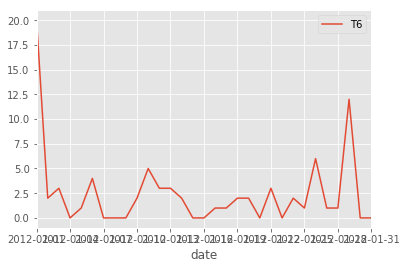

In [34]:
df_2012_01.plot(x='date',y='T6')
plt.show()

In [22]:
#mean+2std -test outlier
outliers=df_2012_01[df_2012_01['T6']>np.mean(df_2012_01['T6'])+2*np.std(df_2012_01['T6'])]
outliers

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
212,2012-01-01,15.0,9.0,7.0,18.0,12.0,20.0,0.0,0.0,3.0,1.0
240,2012-01-29,9.0,7.0,8.0,20.0,11.0,12.0,0.0,1.0,2.0,0.0


In [23]:
df_2012_01.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.387097,0.516129,0.483871,1.870968,0.741935,2.483871,0.387097,0.516129,1.903226,0.548387
std,3.051529,2.014464,1.877427,4.645729,2.874807,4.065062,0.495138,0.569852,1.274228,0.767624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000
max,15.000000,9.000000,8.000000,20.000000,12.000000,20.000000,1.000000,2.000000,5.000000,2.000000


In [46]:
#turn off warning 
pd.options.mode.chained_assignment = None

In [47]:
#mark outlier identifier
df_2012_01.loc[:,'Outlier'] = np.where(df_2012_01['T4'] < 10, 0, 1)

In [48]:
df_2012_01.head()

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,Outlier,previous_d_T4
212,2012-01-01,15.0,9.0,7.0,18.0,12.0,20.0,0.0,0.0,3.0,1.0,1,NaN
213,2012-01-02,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0,18.0
214,2012-01-03,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0,0.0
215,2012-01-04,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0,1.0
216,2012-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0,0.0


In [49]:
#drop outlier
df_2012_01.drop(outliers.index)

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,Outlier,previous_d_T4
213,2012-01-02,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0,18.0
214,2012-01-03,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,2.0,0.0,0,0.0
215,2012-01-04,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0,1.0
216,2012-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0,0.0
217,2012-01-06,3.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0,0,0.0
218,2012-01-07,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0,0.0
219,2012-01-08,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,1.0
220,2012-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0,1.0
221,2012-01-10,1.0,0.0,0.0,3.0,0.0,2.0,0.0,1.0,1.0,2.0,0,0.0
222,2012-01-11,0.0,0.0,0.0,1.0,0.0,5.0,1.0,1.0,4.0,0.0,0,3.0


In [50]:
df_2012_01['previous_d_T4']=df_2012_01['T4'].shift(1)

In [51]:
df_delta_r=df_2012_01[['date','T4','previous_d_T4']]

In [52]:
df_delta_r.head()

,date,T4,previous_d_T4
212,2012-01-01,18.0,NaN
213,2012-01-02,0.0,18.0
214,2012-01-03,1.0,0.0
215,2012-01-04,0.0,1.0
216,2012-01-05,0.0,0.0


In [53]:
df_delta_r['delta']=(df_delta_r['T4']-df_delta_r['previous_d_T4'])/df_delta_r['previous_d_T4']

In [55]:
df_delta_r['delta']=df_delta_r['delta'].map(lambda n: '{:,.2%}'.format(n))

In [56]:
#replace df values
df_delta_r['delta'].replace([np.inf,-np.inf],np.nan,inplace=True)

In [57]:
df_delta_r

,date,T4,previous_d_T4,delta
212,2012-01-01,18.0,NaN,nan%
213,2012-01-02,0.0,18.0,-100.00%
214,2012-01-03,1.0,0.0,nan%
215,2012-01-04,0.0,1.0,-100.00%
216,2012-01-05,0.0,0.0,nan%
217,2012-01-06,0.0,0.0,nan%
218,2012-01-07,1.0,0.0,nan%
219,2012-01-08,1.0,1.0,0.00%
220,2012-01-09,0.0,1.0,-100.00%
221,2012-01-10,3.0,0.0,nan%


In [ ]:
#plot date---scatterplot with matplotlib